<a href="https://colab.research.google.com/github/splenwilz/Predicting-Oil-Production-in-Field-X-in-the-Niger-Delta-using-Artificial-Neural-Network/blob/main/SCRIPTS/ANN_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Reading the oil data
import pandas as pd
import numpy as np
import keras
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px

# To remove the scientific notation from numpy arrays
np.set_printoptions(suppress=True)
 
# OilData=pd.read_csv('/content/final_vpd.csv')



url = 'https://raw.githubusercontent.com/splenwilz/Predicting-Oil-Production-in-Field-X-in-the-Niger-Delta-using-Artificial-Neural-Network/main/DATASET/final_vpd.csv'
OilData = pd.read_csv(url, index_col=0)
print('Shape before deleting duplicate values:', OilData.shape)

# Removing duplicate rows if any
OilData= OilData.drop_duplicates()
print('Shape After deleting duplicate values:', OilData.shape)

# Printing sample data
# Start observing the Quantitative/Categorical/Qualitative variables
OilData.head(10)

# OilData.info()

Shape before deleting duplicate values: (7879, 11)
Shape After deleting duplicate values: (7879, 11)


,DATEPRD,NPD_WELL_BORE_CODE,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DP_TUBING,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
0,2014-04-22,7405,24.0,289.421362,182.059312,107.362050,37.939251,78.935409,631.47,90439.09,0.0
1,2014-04-23,7405,24.0,270.239793,171.052782,99.187011,60.756579,70.627109,1166.46,165720.39,0.0
2,2014-04-24,7405,24.0,262.842748,168.241977,94.600770,63.046800,66.049151,1549.81,221707.31,0.0
3,2014-04-25,7405,24.0,255.526995,165.538903,89.988092,64.547229,61.405386,1248.70,178063.52,0.0
4,2014-04-26,7405,24.0,247.199052,162.422242,84.776810,65.723694,56.147906,1345.78,192602.19,0.0
5,2014-04-27,7405,24.0,240.736417,159.899020,80.837397,66.933732,52.201747,1349.56,194496.27,0.0
6,2014-04-28,7405,24.0,235.020931,157.683220,77.337711,67.848348,48.707584,1345.61,192899.71,0.0
7,2014-04-29,7405,24.0,232.743710,156.794893,75.948817,65.706919,47.375715,1279.46,184900.31,0.0
8,2014-04-30,7405,24.0,233.297778,157.179385,76.118393,62.795644,47.610604,1225.62,177107.86,0.0
9,2014-05-01,7405,24.0,231.088898,156.398978,74.689920,62.376834,46.195843,1212.90,174608.88,0.0


In [4]:


# Observing the summarized information of data
# Data types, Missing values based on number of non-null values Vs total rows etc.
# Remove those variables from data which have too many missing values (Missing Values > 30%)
# Remove Qualitative variables which cannot be used in Machine Learning
OilData.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 7879 entries, 0 to 7878
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   DATEPRD                7879 non-null   object 
 1   NPD_WELL_BORE_CODE     7879 non-null   int64  
 2   ON_STREAM_HRS          7879 non-null   float64
 3   AVG_DOWNHOLE_PRESSURE  7879 non-null   float64
 4   AVG_DP_TUBING          7879 non-null   float64
 5   AVG_WHP_P              7879 non-null   float64
 6   AVG_WHT_P              7879 non-null   float64
 7   DP_CHOKE_SIZE          7879 non-null   float64
 8   BORE_OIL_VOL           7879 non-null   float64
 9   BORE_GAS_VOL           7879 non-null   float64
 10  BORE_WAT_VOL           7879 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 738.7+ KB


In [5]:
# Looking at the descriptive statistics of the data
OilData.describe(include='all')

,DATEPRD,NPD_WELL_BORE_CODE,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DP_TUBING,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
count,7879,7879.000000,7879.000000,7879.000000,7879.000000,7879.000000,7879.000000,7879.000000,7879.000000,7879.000000,7879.000000
unique,2962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2014-04-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,5987.174007,23.058287,181.634280,153.874415,45.570771,76.463233,16.443210,1268.678757,186420.613221,1942.504168
std,NaN,799.046104,3.489261,105.168306,70.800246,18.936817,17.514662,17.393822,1349.549273,191091.745893,1692.747906
min,NaN,5351.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.170000,28.860000,-457.840000
25%,NaN,5351.000000,24.000000,197.442990,148.964914,32.104841,72.689523,3.460348,269.730000,41279.715000,189.960000
50%,NaN,5599.000000,24.000000,230.257783,176.099028,38.591298,82.262238,9.002367,735.850000,113767.920000,1618.100000
75%,NaN,7078.000000,24.000000,251.894526,203.868533,55.240639,88.480889,24.302474,1685.280000,254023.075000,3428.685000


In [6]:


# Finging unique values for each column
# TO understand which column is categorical and which one is Continuous
# Typically if the numer of unique values are < 20 then the variable is likely to be a category otherwise continuous
OilData.nunique()



DATEPRD                  2962
NPD_WELL_BORE_CODE          5
ON_STREAM_HRS             594
AVG_DOWNHOLE_PRESSURE    5922
AVG_DP_TUBING            7842
AVG_WHP_P                7851
AVG_WHT_P                7850
DP_CHOKE_SIZE            7853
BORE_OIL_VOL             7689
BORE_GAS_VOL             7874
BORE_WAT_VOL             7242
dtype: int64

In [7]:


# Finding how many missing values are there for each column
OilData.isnull().sum()



DATEPRD                  0
NPD_WELL_BORE_CODE       0
ON_STREAM_HRS            0
AVG_DOWNHOLE_PRESSURE    0
AVG_DP_TUBING            0
AVG_WHP_P                0
AVG_WHT_P                0
DP_CHOKE_SIZE            0
BORE_OIL_VOL             0
BORE_GAS_VOL             0
BORE_WAT_VOL             0
dtype: int64

In [8]:
# Treating missing values of continuous variable with Median value
# OilData['AVG_DOWNHOLE_PRESSURE'].fillna(value=OilData['AVG_DOWNHOLE_PRESSURE'].median(), inplace=True)
# OilData['AVG_DOWNHOLE_TEMPERATURE'].fillna(value=OilData['AVG_DOWNHOLE_TEMPERATURE'].median(), inplace=True)
# OilData['AVG_DP_TUBING'].fillna(value=OilData['AVG_DP_TUBING'].median(), inplace=True)
# OilData['AVG_ANNULUS_PRESS'].fillna(value=OilData['AVG_ANNULUS_PRESS'].median(), inplace=True)
# OilData['AVG_CHOKE_SIZE_P'].fillna(value=OilData['AVG_CHOKE_SIZE_P'].median(), inplace=True)

In [9]:
# Checking missing values again after the treatment
OilData.isnull().sum()

DATEPRD                  0
NPD_WELL_BORE_CODE       0
ON_STREAM_HRS            0
AVG_DOWNHOLE_PRESSURE    0
AVG_DP_TUBING            0
AVG_WHP_P                0
AVG_WHT_P                0
DP_CHOKE_SIZE            0
BORE_OIL_VOL             0
BORE_GAS_VOL             0
BORE_WAT_VOL             0
dtype: int64

In [10]:
OilData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7879 entries, 0 to 7878
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   DATEPRD                7879 non-null   object 
 1   NPD_WELL_BORE_CODE     7879 non-null   int64  
 2   ON_STREAM_HRS          7879 non-null   float64
 3   AVG_DOWNHOLE_PRESSURE  7879 non-null   float64
 4   AVG_DP_TUBING          7879 non-null   float64
 5   AVG_WHP_P              7879 non-null   float64
 6   AVG_WHT_P              7879 non-null   float64
 7   DP_CHOKE_SIZE          7879 non-null   float64
 8   BORE_OIL_VOL           7879 non-null   float64
 9   BORE_GAS_VOL           7879 non-null   float64
 10  BORE_WAT_VOL           7879 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 738.7+ KB


In [11]:
# Separate Target Variable and Predictor Variables
TargetVariable=['BORE_OIL_VOL']
Predictors=['ON_STREAM_HRS', 'AVG_DOWNHOLE_PRESSURE', 'DP_CHOKE_SIZE', 'BORE_WAT_VOL', 'BORE_GAS_VOL', 'AVG_WHT_P', 'AVG_WHP_P', 'AVG_DP_TUBING']
 
X=OilData[Predictors].values
y=OilData[TargetVariable].values
 
### Sandardization of data ###
from sklearn.preprocessing import StandardScaler
PredictorScaler=StandardScaler()
TargetVarScaler=StandardScaler()
 
# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)
TargetVarScalerFit=TargetVarScaler.fit(y)
 
# Generating the standardized values of X and y
X=PredictorScalerFit.transform(X)
y=TargetVarScalerFit.transform(y)
 
# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

 
# Quick sanity check with the shapes of Training and testing datasets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(5515, 8)
(5515, 1)
(2364, 8)
(2364, 1)


Epoch 1/50
276/276 [==============================] - 1s 3ms/step - loss: 0.6013 - accuracy: 0.0000e+00 - val_loss: 0.1895 - val_accuracy: 0.0000e+00
Epoch 2/50
276/276 [==============================] - 1s 2ms/step - loss: 0.1033 - accuracy: 0.0000e+00 - val_loss: 0.0483 - val_accuracy: 0.0000e+00
Epoch 3/50
276/276 [==============================] - 1s 2ms/step - loss: 0.0331 - accuracy: 0.0000e+00 - val_loss: 0.0186 - val_accuracy: 0.0000e+00
Epoch 4/50
276/276 [==============================] - 1s 2ms/step - loss: 0.0147 - accuracy: 0.0000e+00 - val_loss: 0.0107 - val_accuracy: 0.0000e+00
Epoch 5/50
276/276 [==============================] - 1s 2ms/step - loss: 0.0099 - accuracy: 0.0000e+00 - val_loss: 0.0079 - val_accuracy: 0.0000e+00
Epoch 6/50
276/276 [==============================] - 1s 2ms/step - loss: 0.0081 - accuracy: 0.0000e+00 - val_loss: 0.0065 - val_accuracy: 0.0000e+00
Epoch 7/50
276/276 [==============================] - 1s 2ms/step - loss: 0.0069 - accuracy: 0.0000e

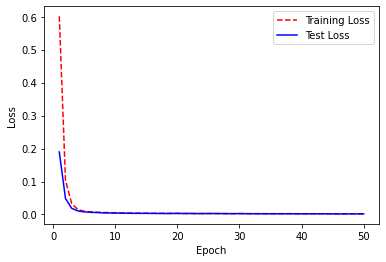

In [12]:
from keras.metrics import accuracy
# importing the libraries
from keras.models import Sequential
from keras.layers import Dense
 
# create ANN model
model = Sequential()
 
# Defining the Input layer and FIRST hidden layer, both are same!
model.add(Dense(units=5, input_dim=8, kernel_initializer='normal', activation='relu'))
 
# Defining the Second layer of the model
# after the first layer we don't have to specify input_dim as keras configure it automatically
model.add(Dense(units=5, kernel_initializer='normal', activation='tanh'))
 
# The output neuron is a single fully connected node 
# Since we will be predicting a single number
model.add(Dense(1, kernel_initializer='normal'))
 
# Compiling the model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
 
# Fitting the ANN to the Training set
# history = model.fit(X_train, y_train , batch_size = 20, epochs = 50, verbose=1)

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=20, epochs=50, verbose=1)

# Get training and test loss histories
training_loss = history.history['loss']
test_loss = history.history['val_loss']

# Create count of the number of epochs

epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();







# history = model.fit(X_train, y_train, epochs=50, batch_size=20, validation_data=(X_val, y_val))

# Loss
# loss_train = history.history['loss']
# loss_val = history.history['val_loss']
# epochs = range(1,51)
# plt.plot(epochs, loss_train, 'g', label='Training loss')
# plt.plot(epochs, loss_val, 'b', label='validation loss')
# plt.title('Training and Validation loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()


In [13]:
weights = model.get_weights()
wt = pd.DataFrame(weights, columns=['w1'])
# pd.DataFrame({'Column1': weights[:, 0], 'Column2': weights[:, 1]})
print('columns')
print(len(weights[0]))
print('rows')
print(len(weights))
# {layer.name: layer.get_weights() for layer in model.layers}
# print(model.layers[0].trainable_weights)
print("Weights and biases of the layers after training the model: \n")
for layer in model.layers:
  print(layer.name)
  print("Weights")
  print("Shape: ",layer.get_weights()[0].shape,'\n',layer.get_weights()[0])
  print("Bias")
  print("Shape: ",layer.get_weights()[1].shape,'\n',layer.get_weights()[1],'\n')

# print(wt.head())

columns
8
rows
6
Weights and biases of the layers after training the model: 

dense
Weights
Shape:  (8, 5) 
 [[ 0.01264218  0.06791591 -0.05199822 -0.01693375 -0.05369859]
 [ 0.01819459  0.08346608 -0.0971503  -0.06647472 -0.20923963]
 [ 0.03329279 -0.01878155  0.03047488 -0.12002964 -0.13605393]
 [-0.1284996  -0.00914916 -0.05640509  0.08457226  0.07095274]
 [ 0.35615236 -0.22309542 -0.20325987 -0.10799038  0.33156905]
 [ 0.18034622 -0.03129448  0.01779287  0.40945014  0.13249673]
 [ 0.00574606  0.00600943 -0.02381771 -0.04995169 -0.07674343]
 [-0.04275152  0.15573469 -0.0293155  -0.07802642  0.14705807]]
Bias
Shape:  (5,) 
 [0.3732631  0.61133075 0.66061133 0.40216458 0.34650406] 

dense_1
Weights
Shape:  (5, 5) 
 [[-0.24089044  0.21237013 -0.16720846 -0.25738063 -0.16302042]
 [ 0.33721787 -0.17170309  0.5180251   0.097837    0.07359586]
 [ 0.43010062 -0.28524956  0.51264954  0.25279593  0.30350894]
 [ 0.38567993 -0.00406972  0.28945333  0.02472292  0.08834098]
 [-0.0971276   0.11965

/usr/local/lib/python3.8/dist-packages/pandas/core/internals/construction.py:540: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  values = np.array([convert(v) for v in values])


In [14]:
# Defining a function to find the best parameters for ANN
def FunctionFindBestParams(X_train, y_train, X_test, y_test):
    
    # Defining the list of hyper parameters to try
    batch_size_list=[5, 10, 15, 20]
    epoch_list  =   [5, 10, 50, 100]
    
    import pandas as pd
    SearchResultsData=pd.DataFrame(columns=['TrialNumber', 'Parameters', 'Accuracy'])
    
    # initializing the trials
    TrialNumber=0
    for batch_size_trial in batch_size_list:
        for epochs_trial in epoch_list:
            TrialNumber+=1
            # create ANN model
            model = Sequential()
            # Defining the first layer of the model
            model.add(Dense(units=5, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))
 
            # Defining the Second layer of the model
            model.add(Dense(units=5, kernel_initializer='normal', activation='relu'))
 
            # The output neuron is a single fully connected node 
            # Since we will be predicting a single number
            model.add(Dense(1, kernel_initializer='normal'))
 
            # Compiling the model
            model.compile(loss='mean_squared_error', optimizer='adam')
 
            # Fitting the ANN to the Training set
            model.fit(X_train, y_train ,batch_size = batch_size_trial, epochs = epochs_trial, verbose=0)
 
            MAPE = np.mean(100 * (np.abs(y_test-model.predict(X_test))/y_test))
            
            # printing the results of the current iteration
            print(TrialNumber, 'Parameters:','batch_size:', batch_size_trial,'-', 'epochs:',epochs_trial, 'Accuracy:', 100-MAPE)
            
            SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],
                                                                    columns=['TrialNumber', 'Parameters', 'Accuracy'] ))
    return(SearchResultsData)
 
 
######################################################
# Calling the function
ResultsData=FunctionFindBestParams(X_train, y_train, X_test, y_test)

74/74 [==============================] - 0s 1ms/step
1 Parameters: batch_size: 5 - epochs: 5 Accuracy: 75.93613101893916
74/74 [==============================] - 0s 1ms/step
2 Parameters: batch_size: 5 - epochs: 10 Accuracy: 90.12326776174635
74/74 [==============================] - 0s 1ms/step
3 Parameters: batch_size: 5 - epochs: 50 Accuracy: 85.71742768250193
74/74 [==============================] - 0s 1ms/step
4 Parameters: batch_size: 5 - epochs: 100 Accuracy: 84.23074034227872
74/74 [==============================] - 0s 1ms/step
5 Parameters: batch_size: 10 - epochs: 5 Accuracy: 44.79195009953319
74/74 [==============================] - 0s 1ms/step
6 Parameters: batch_size: 10 - epochs: 10 Accuracy: 58.58852519083662
74/74 [==============================] - 0s 1ms/step
7 Parameters: batch_size: 10 - epochs: 50 Accuracy: 71.61527527415811
74/74 [==============================] - 0s 1ms/step
8 Parameters: batch_size: 10 - epochs: 100 Accuracy: 63.22263271935789
74/74 [=============

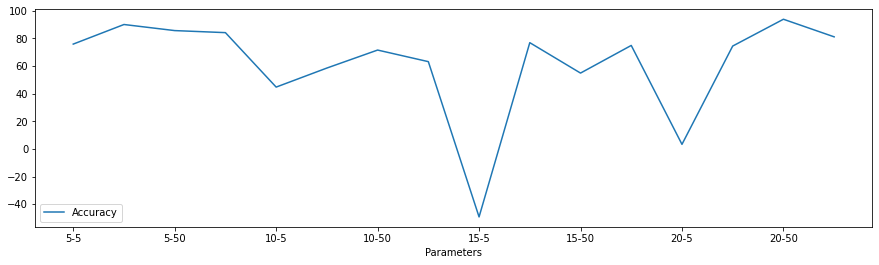

In [15]:

%matplotlib inline
ResultsData.plot(x='Parameters', y='Accuracy', figsize=(15,4), kind='line')

In [16]:
# Fitting the ANN to the Training set
model.fit(X_train, y_train ,batch_size = 5, epochs = 50, verbose=0)
 
# Generating Predictions on testing data
Predictions=model.predict(X_test)
 
# Scaling the predicted Price data back to original price scale
Predictions=TargetVarScalerFit.inverse_transform(Predictions)
 
# Scaling the y_test Price data back to original price scale
y_test_orig=TargetVarScalerFit.inverse_transform(y_test)
 
# Scaling the test data back to original scale
Test_Data=PredictorScalerFit.inverse_transform(X_test)
 
TestingData=pd.DataFrame(data=Test_Data, columns=Predictors)
TestingData['BORE_OIL_VOL']=y_test_orig
TestingData['PREDICTED_BORE_OIL_VOL']=Predictions
TestingData.head()

74/74 [==============================] - 0s 1ms/step


,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,DP_CHOKE_SIZE,BORE_WAT_VOL,BORE_GAS_VOL,AVG_WHT_P,AVG_WHP_P,AVG_DP_TUBING,BORE_OIL_VOL,PREDICTED_BORE_OIL_VOL
0,10.59153,285.247876,11.631128,748.74,28929.56,60.783298,36.542678,248.705198,162.02,162.126389
1,24.00000,262.652684,59.753774,4.42,491322.97,76.315515,91.715929,170.936755,3186.96,3293.244629
2,24.00000,0.000000,5.100714,4567.59,102016.95,90.941582,32.103586,32.103586,569.14,624.930908
3,24.00000,270.424977,72.300099,75.56,414713.42,75.230339,104.993111,165.431866,2905.92,2788.230957
4,24.00000,243.388305,14.205008,3197.43,381962.80,91.610155,46.616570,196.771735,2530.04,2584.552002


In [17]:
# Computing the absolute percent error
APE=100*(abs(TestingData['BORE_OIL_VOL']-TestingData['PREDICTED_BORE_OIL_VOL'])/TestingData['BORE_OIL_VOL'])
TestingData['APE']=APE
 
print('The Accuracy of ANN model is:', 100-np.mean(APE))
TestingData.head()

The Accuracy of ANN model is: 91.8251628933907


,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,DP_CHOKE_SIZE,BORE_WAT_VOL,BORE_GAS_VOL,AVG_WHT_P,AVG_WHP_P,AVG_DP_TUBING,BORE_OIL_VOL,PREDICTED_BORE_OIL_VOL,APE
0,10.59153,285.247876,11.631128,748.74,28929.56,60.783298,36.542678,248.705198,162.02,162.126389,0.065664
1,24.00000,262.652684,59.753774,4.42,491322.97,76.315515,91.715929,170.936755,3186.96,3293.244629,3.334985
2,24.00000,0.000000,5.100714,4567.59,102016.95,90.941582,32.103586,32.103586,569.14,624.930908,9.802669
3,24.00000,270.424977,72.300099,75.56,414713.42,75.230339,104.993111,165.431866,2905.92,2788.230957,4.049975
4,24.00000,243.388305,14.205008,3197.43,381962.80,91.610155,46.616570,196.771735,2530.04,2584.552002,2.154591


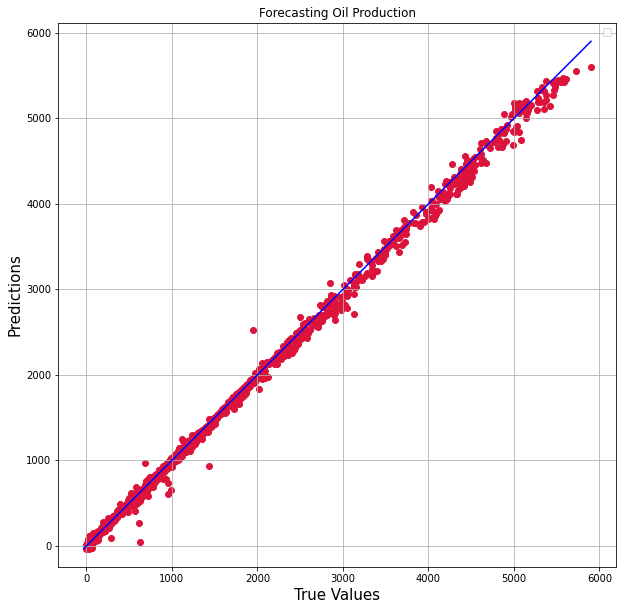

In [18]:

import matplotlib.pyplot as plt


plt.figure(figsize=(10,10))
plt.scatter(TestingData['BORE_OIL_VOL'], TestingData['PREDICTED_BORE_OIL_VOL'], c="crimson")

plt.title('Forecasting Oil Production')
p1 = max(max(TestingData['PREDICTED_BORE_OIL_VOL']), max(TestingData['BORE_OIL_VOL']))
p2 = min(min(TestingData['PREDICTED_BORE_OIL_VOL']), min(TestingData['BORE_OIL_VOL']))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.grid(True)
plt.legend()
plt.savefig('dt.png')
plt.show()


# The blue line made by p1 and p2 is a line that represents perfect regression. 
# The closer the points are to the line, the more accurate the model is. 
# It can also be used to understand if the model is under or over predicting. 
# If points are above the blue line, the model is over predicting while if the 
# points are below the blue line, the model is under predicting

In [19]:
import math
MSE=np.square(np.subtract(TestingData['BORE_OIL_VOL'],TestingData['PREDICTED_BORE_OIL_VOL'])).mean()
rsme=math.sqrt(MSE)
print("Root Mean Square Error:")
print(MSE)
print("Root Mean Square Error:")
print(rsme)

Root Mean Square Error:
3284.800111649347
Root Mean Square Error:
57.31317572469133
